In [1]:
# 安装对应的包
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

In [3]:
# 读取数据集
df = pd.read_csv(r'covid19_tweets_cleaned_final.csv', lineterminator='\n')

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet\r',
       'cleaned_text'],
      dtype='object')


In [5]:
# 选择一个示例推文
# 对示例推文进行情感分析
example_text = df['cleaned_text'].iloc[0]
sentiment_score = analyzer.polarity_scores(example_text)

# 打印示例推文和分析结果
print("Example Tweet:", example_text)
print("Sentiment Analysis Result:", sentiment_score)

Example Tweet: smelled scent hand sanitizers today past think intoxicated
Sentiment Analysis Result: {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}


VADER 输出一个包含四个键值的字典，每个键表示一种情感类别：
'neg'：表示文本中的负向情感的强度，范围在 [0, 1] 之间。
'neu'：表示文本中的中性情感的强度，范围在 [0, 1] 之间。
'pos'：表示文本中的正向情感的强度，范围在 [0, 1] 之间。
'compound'：综合得分，范围在 [-1, 1] 之间。这个得分是一个整体的情感指标，如果得分为正，则文本整体偏向正向；为负，则偏向负向。

In [6]:
# 对 'text' 列中的每个推文进行情感分析，并保存情感分数
df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x))

# 将结果展开为独立的列（neg, neu, pos, compound）
df = pd.concat([df.drop(['sentiment'], axis=1), df['sentiment'].apply(pd.Series)], axis=1)

# 查看前几行结果
print(df.head())

   Unnamed: 0        user_name         user_location  \
0           0           ᏉᎥ☻լꂅϮ            astroworld   
1           1    Tom Basile 🇺🇸          New York, NY   
2           2  Time4fisticuffs      Pewee Valley, KY   
3           3      ethel mertz  Stuck in the Middle    
4           4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   

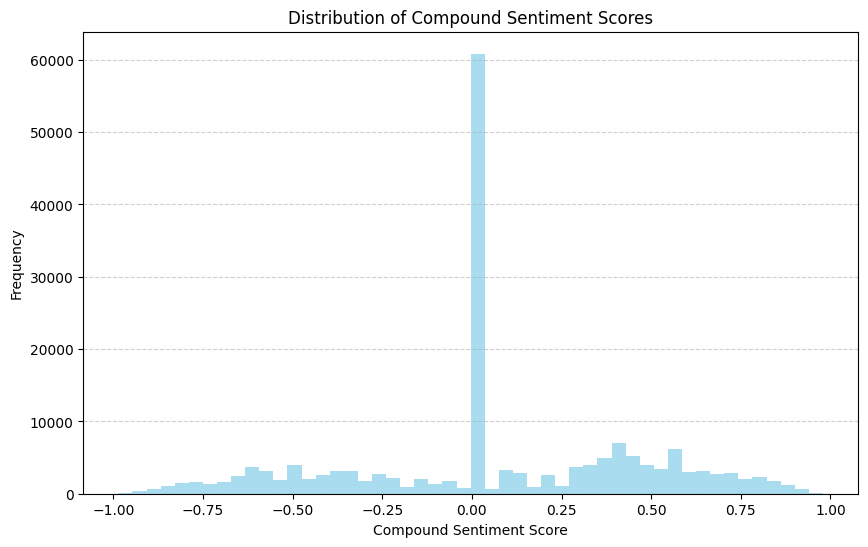

In [7]:
# 提取情感分数
df['compound'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 绘制情感分数的分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df['compound'], bins=50, color='skyblue', alpha=0.7)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [8]:
# 保存数据集
df.to_csv('covid19_tweets_cleaned_senti.csv')